# Lab 2

## View the Data

In [1]:
#importing data from S3
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://kdr-ia-340-2025/Lottery_Powerball_Winning_Numbers__Beginning_2010.csv')
df.head() 

,Draw Date,Winning Numbers,Multiplier
0,09/26/2020,11 21 27 36 62 24,3.0
1,09/30/2020,14 18 36 49 67 18,2.0
2,10/03/2020,18 31 36 43 47 20,2.0
3,10/07/2020,06 24 30 53 56 19,2.0
4,10/10/2020,05 18 23 40 50 18,3.0


In [2]:
df.shape #Checking rows and columns

(1827, 3)

In [3]:
df.info() #Chekcing types of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Draw Date        1827 non-null   object 
 1   Winning Numbers  1827 non-null   object 
 2   Multiplier       1617 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.9+ KB


In [4]:
df.describe() #getting descriptive statistics from numeric variables. 

,Multiplier
count,1617.000000
mean,2.784787
std,1.174477
min,2.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,10.000000


There are 1827 rows, and 3 columns. 2 columns are considered categorical variables, while 1 column (multiplier) is numeric. The mean is above the median in the multiplier column, indicating that the data may be skewed to the right. 

## Clean the Data

In [5]:
# splitting Winning Numbers Column into individual columns and renaming them
winning_cols = ['Winning Number 1', 'Winning Number 2',
                'Winning Number 3', 'Winning Number 4',
                'Winning Number 5', 'Winning Powerball']

df[winning_cols] = df['Winning Numbers'].str.split(' ', expand=True).iloc[:, :6]

df[winning_cols] = df[winning_cols].astype(int) #changing new columns to numeric

df = df.drop(columns=['Winning Numbers']) #dropping original column

df['Draw Date'] = pd.to_datetime(df['Draw Date'], format='%m/%d/%Y') #converting to standard datetime
 
print(df.head()) #checking results

   Draw Date  Multiplier  Winning Number 1  Winning Number 2  \
0 2020-09-26         3.0                11                21   
1 2020-09-30         2.0                14                18   
2 2020-10-03         2.0                18                31   
3 2020-10-07         2.0                 6                24   
4 2020-10-10         3.0                 5                18   

   Winning Number 3  Winning Number 4  Winning Number 5  Winning Powerball  
0                27                36                62                 24  
1                36                49                67                 18  
2                36                43                47                 20  
3                30                53                56                 19  
4                23                40                50                 18  


In [6]:
df.isnull().sum() #checking for missing values

Draw Date              0
Multiplier           210
Winning Number 1       0
Winning Number 2       0
Winning Number 3       0
Winning Number 4       0
Winning Number 5       0
Winning Powerball      0
dtype: int64

In [7]:
df['Multiplier'] = df['Multiplier'].fillna(1).astype(int) #replacing missing values with 1
df.isnull().sum() #checking values were filled

Draw Date            0
Multiplier           0
Winning Number 1     0
Winning Number 2     0
Winning Number 3     0
Winning Number 4     0
Winning Number 5     0
Winning Powerball    0
dtype: int64

I restructured and renamed the 'Winning Numbers' column to 'Winning Number 1-5' and 'Winning Powerball' so that the data for the winning lottery numbers can be manipulated and analyzed. I also converted them to integer format. Additionally, I changed the drawing date to a specific formula for datetime. Then, I checked for missing values, in which the 'Multiplier' column came back with 210 missing values. Since a nonexistent multiplier for the lottery would be 1, I then replaced the empty values with a 1. 

## Manipulate the Data

In [13]:
df["Winning Powerball"].head() #display single column

0    24
1    18
2    20
3    19
4    18
Name: Winning Powerball, dtype: int64

In [16]:
#sorting and slicing column by draw date
df_sorted = df.sort_values("Draw Date")[["Draw Date", "Winning Powerball"]]
df_sorted.head()
df_slice = df.loc[5:10, ["Draw Date", "Winning Powerball"]]
df_slice

,Draw Date,Winning Powerball
5,2020-10-14,5
6,2020-10-17,23
7,2020-10-21,26
8,2020-10-24,6
9,2020-10-28,13
10,2020-10-31,24


In [19]:
#filtering for specific powerball value
df_filtered = df[df["Winning Powerball"] == 13][["Draw Date", "Winning Powerball"]]
df_filtered.head()

,Draw Date,Winning Powerball
9,2020-10-28,13
13,2020-11-11,13
24,2020-12-19,13
30,2021-01-09,13
114,2020-03-21,13


I selected to look at the 'Winning Powerball' variable, and then sorted by Powerball values equivalent to 13. The first output shows the rows I sliced, and then the second output is the first 5 columns where the winning powerball was equal to 13. I wrote the code so that it only displays the Draw Date and Winning Powerball to reduce confusion. 

## Group and Visualize Data

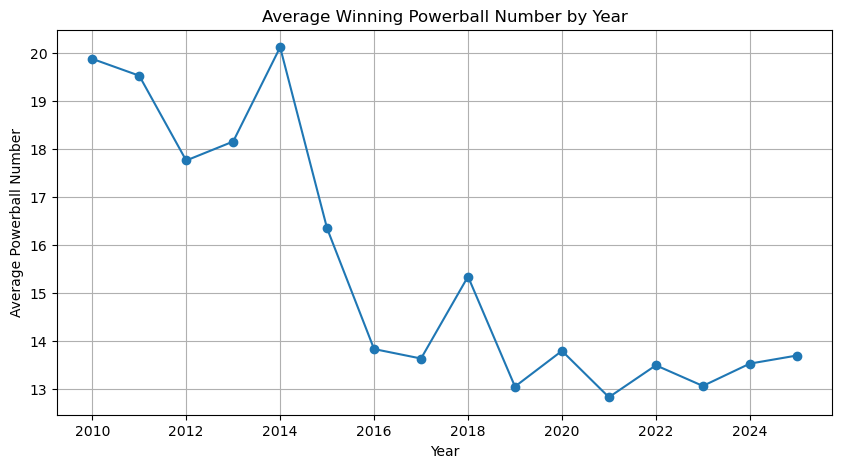

In [21]:
# import necessary libraries
import matplotlib.pyplot as plt

# Average Powerball number by year
df['Year'] = df['Draw Date'].dt.year
avg_powerball = df.groupby('Year')['Winning Powerball'].mean()

# Line plot
plt.figure(figsize=(10, 5))
avg_powerball.plot(kind='line', marker='o')
plt.title("Average Winning Powerball Number by Year")
plt.xlabel("Year")
plt.ylabel("Average Powerball Number")
plt.grid(True)
plt.show()


In this plot, I used groupby to create an average of winning powerball numbers by year, and then plotted them on a line graph to observe trends over time. What can be seen here is how the winning powerball numbers might have shifted, in which it can be seen that the average winning powerball number has been decreasing since 2010. This indicates it is favorable to select a lower powerball number for current lottery drawings to have a greater chance at getting the winning powerball number. 

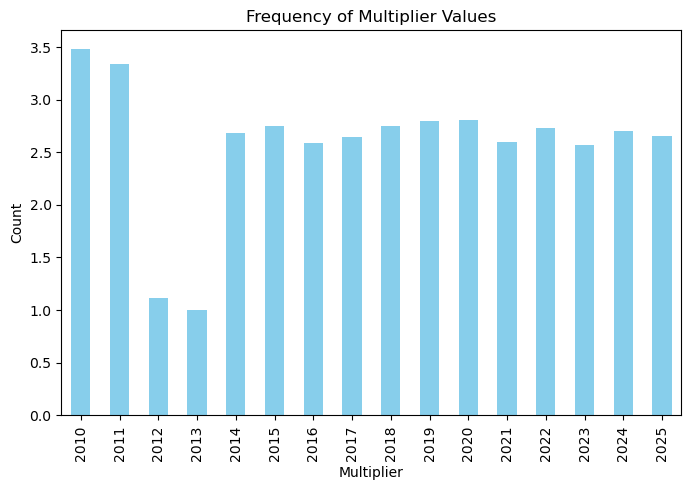

In [26]:
# Frequency of Winning Multiplier values
multiplier_counts = df.groupby('Year')['Multiplier'].mean()

# Bar chart
plt.figure(figsize=(8, 5))
multiplier_counts.plot(kind='bar', color='skyblue')
plt.title("Frequency of Multiplier Values")
plt.xlabel("Multiplier")
plt.ylabel("Count")
plt.show()

This plot is a graph of the average multiplier values by year. I grouped the average winning multiplier by year to see if there are any trends, in which it seems 2012 and 2013 had very few multipliers above 1. However, it can be seen from the visualization that the multiplier averages evened out and are similar every year from 2014 onwards, hovering between 2.5 and 3. 